In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words (among top max_features most common words)
batch_size = 128

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Loading data...


In [2]:
def create_simple_rnn_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(SimpleRNN(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [3]:
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [4]:
def create_bidirectional_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
def create_deep_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [6]:
models = {
    "Simple RNN": create_simple_rnn_model(),
    "LSTM": create_lstm_model(),
    "Bidirectional LSTM": create_bidirectional_lstm_model(),
    "Deep LSTM": create_deep_lstm_model()
}

history = {}
evaluation = {}

for name, model in models.items():
    print(f"\nTraining {name} model...")
    history[name] = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2)
    evaluation[name] = model.evaluate(x_test, y_test, batch_size=batch_size)


Training Simple RNN model...
Epoch 1/5


D:\PythonProjects\DataScience\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 227ms/step - accuracy: 0.5293 - loss: 0.6875 - val_accuracy: 0.5932 - val_loss: 0.6493
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 222ms/step - accuracy: 0.7248 - loss: 0.5466 - val_accuracy: 0.7812 - val_loss: 0.4658
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 221ms/step - accuracy: 0.8610 - loss: 0.3337 - val_accuracy: 0.8032 - val_loss: 0.4469
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 221ms/step - accuracy: 0.8968 - loss: 0.2538 - val_accuracy: 0.7830 - val_loss: 0.4893
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 219ms/step - accuracy: 0.7172 - loss: 0.6625 - val_accuracy: 0.6196 - val_loss: 0.6472
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - accuracy: 0.6072 - loss: 0.6493

Training LSTM model...
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 880ms/step - accuracy: 0.6336 - loss: 0.6156 - val_accuracy: 0.8378 - val_loss: 0.3830
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 903ms/step - accuracy: 0.8833 - loss: 0.2988 - val_accuracy: 0.8622 - val_loss: 0.32

Simple RNN model - Test Loss: 0.6472973823547363, Test Accuracy: 0.6075599789619446
LSTM model - Test Loss: 0.5403034687042236, Test Accuracy: 0.8333600163459778
Bidirectional LSTM model - Test Loss: 0.392398864030838, Test Accuracy: 0.8586400151252747
Deep LSTM model - Test Loss: 0.38812538981437683, Test Accuracy: 0.8627200126647949


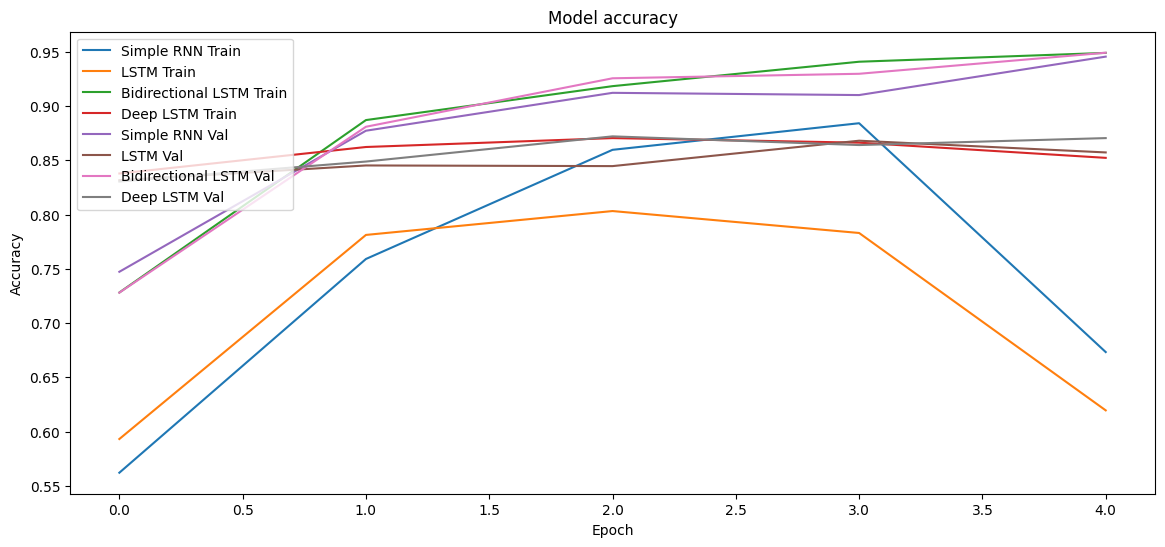

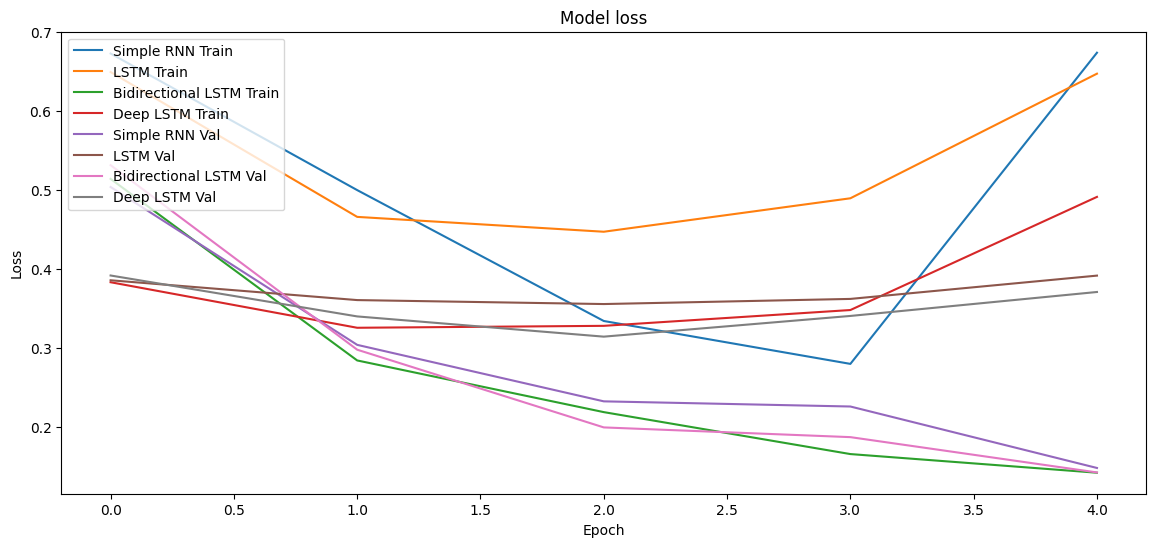

In [7]:
import matplotlib.pyplot as plt

for name, eval in evaluation.items():
    print(f"{name} model - Test Loss: {eval[0]}, Test Accuracy: {eval[1]}")

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
for name, hist in history.items():
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend([f'{name} Train' for name in history.keys()] + [f'{name} Val' for name in history.keys()], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(14, 6))
for name, hist in history.items():
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend([f'{name} Train' for name in history.keys()] + [f'{name} Val' for name in history.keys()], loc='upper left')
plt.show()

1. The Simple RNN model performs the worst among all models. It has the highest test loss and the lowest accuracy. This is expected because Simple RNNs are less effective at capturing long-term dependencies due to the vanishing gradient problem.<br>
2. The LSTM model shows a significant improvement over the Simple RNN. LSTMs are designed to capture long-term dependencies better, which is crucial for understanding the context in text data like movie reviews. The improvement in accuracy (over 22%) demonstrates the effectiveness of LSTMs in handling sequences.<br>
3. The Bidirectional LSTM performs better than the standard LSTM. This model processes the input sequence in both forward and backward directions, allowing it to capture context from both ends of the sequence, which leads to improved performance. The accuracy improvement (about 2.5% over LSTM) shows the added benefit of bidirectional processing.<br>
4. The Deep LSTM model performs the best among all models. By stacking multiple LSTM layers, the model can learn more complex patterns in the data, improving its ability to classify the reviews correctly. The slight improvement in test loss and accuracy over the Bidirectional LSTM indicates that deeper architectures can capture more nuanced patterns in the data.